In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression as LR, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_6_Advertising.csv')

In [3]:
data.head(10)

,No,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [4]:
#As No is serial no we can drop that column from our dataset

In [5]:
data.drop(['No'], axis = 1, inplace=True)

In [6]:
data = pd.DataFrame(data=data)

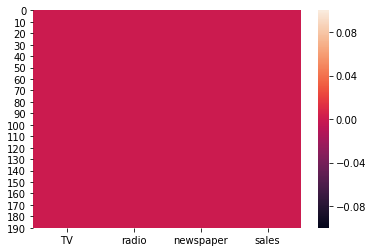

In [7]:
#Checking for null value

sns.heatmap(data.isnull())

No null values present in dataset

In [8]:
#Checking data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


As all data type is in float type, no need to change data type or Encoding required in dataset

In [9]:
#Checking correlation of matrix

data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


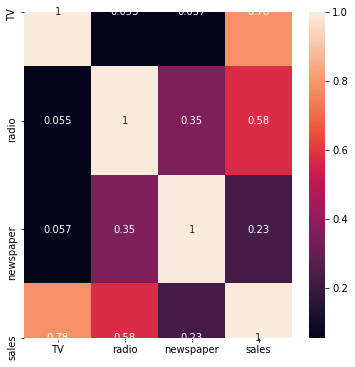

In [10]:
#Representing in heatmap for better understanding
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(),annot=True)

From the above observation:
    
Sales is highly correlated with TV

Sales is less correlated with Newspaper

Sales is moderate correlated with radio


In [11]:
#CHecking the description of dataset

data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


From the above observation

There is a huge difference between 75% and the max value of newspaper

Huge difference between 75% and max value of TV also standard deviation is high

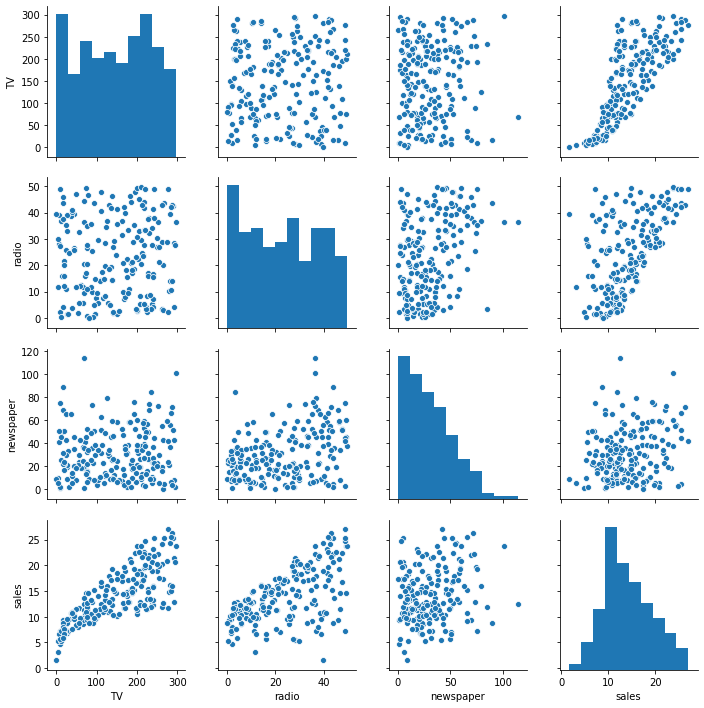

In [12]:
#Lets check sales relations before removing the outliers

sns.pairplot(data)
plt.show()

From the above plot we can say that 

Sales and TV are in relation, TV is increasing sales is increasing simultaneously, and sales is highly dependent on TV.

Sales and radio is also in relation, as increasing in radio values sales is also increasing. 

Sales and newspaper, sales and newspaper relation is spreaded.

TV              AxesSubplot(0.125,0.536818;0.168478x0.343182)
radio        AxesSubplot(0.327174,0.536818;0.168478x0.343182)
newspaper    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
sales        AxesSubplot(0.731522,0.536818;0.168478x0.343182)
dtype: object

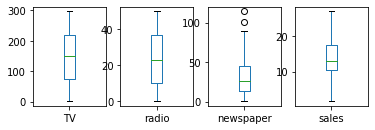

In [13]:
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,4))

Outliers are present in Newspaper

In [14]:
data.shape

(200, 4)

In [15]:
#removing outliers present
from scipy.stats import zscore
z = np.abs(zscore(data))
data = data[(z<3).all(axis=1)]

In [16]:
data.shape

(198, 4)

In [17]:
#checking for swekness
data.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

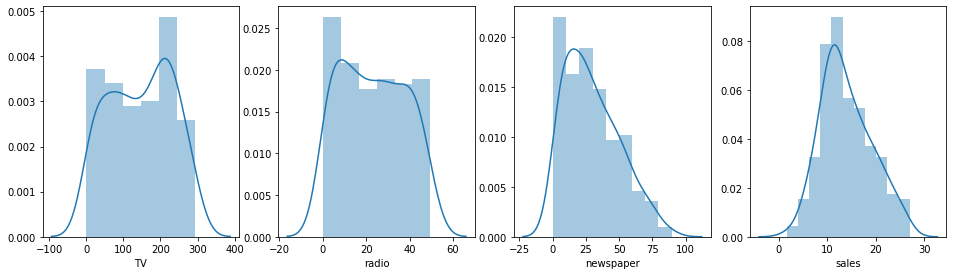

In [18]:
#checking for swekness
collist = data.columns.values
ncol = 12
nrows = 10
plt.figure(figsize=(50,50))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(data[collist[i]])

Data skewness is present in newspaper,

Data is very much distirbuted in TV and radio

In [19]:
#removing the skewness from newspaper as tv, sales and radio have skewness less than .5
transform = np.sqrt(data['newspaper'])
data['newspaper'] = transform

In [20]:
data.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.040649
sales        0.407130
dtype: float64

In [21]:
#Spliting the dataset into x and y

x = data.iloc[:,0:-1]
y = data.sales

In [22]:
x

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [23]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

In [24]:
#Scaling the x with standard scaler

ss=SS()
ss.fit(x)
x=ss.transform(x)

#### PREDICTING WITH SIMPLE LINEAR REGRESSION WITH TV AND SALES

In [25]:
x = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [27]:
lr = LR()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

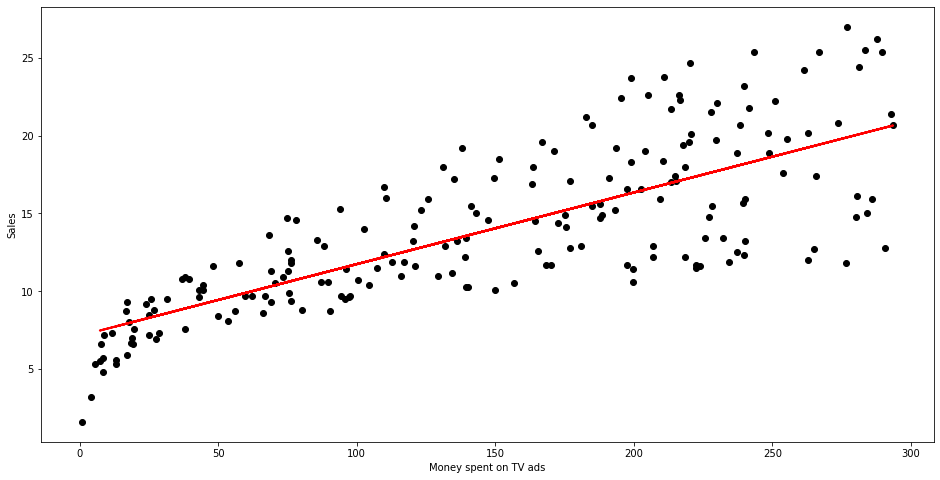

In [28]:
y_pred = lr.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(x, y, c='black')
plt.plot(x_test,y_pred,c='red',linewidth=2)
plt.xlabel("Money spent on TV ads")
plt.ylabel("Sales")
plt.show()

In [29]:
print("Coef",lr.coef_)
print("Intercept",lr.intercept_)

Coef [[0.04604919]]
Intercept [7.13764139]


In [30]:
r2_score(y_test, y_pred)

0.6693607687220126

Coef is very near to zero, model is giving best pridiction with sales

### MULTIPLE LINEAR REGRESSION

In [31]:
#creating a function for testing and training 

def best_model(model):
    i = 0
    max_r2_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        r2_scr=r2_score(test_y,pred_y)
        r2_scr = round(r2_scr*100)
        if r2_scr > max_r2_score:
            max_r2_score = r2_scr
            final_r_state = r_state
    print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)    

In [32]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=15,scoring="r2")

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Score :', round(score.mean()*100))

### LINEAR REGRESSION

##### Using train_test_split

In [33]:
lr = LR()
best_model(lr)

Max R2 Score Corresponding to random state  43  is  77.0


In [34]:
print("Coef",lr.coef_)
print("Intercept",lr.intercept_)

Coef [[0.04499803]]
Intercept [7.30649297]


##### Using cross_val_score

In [35]:
cross_val_function(lr)

Cross Val Score:  [0.65005485 0.48697664 0.58262649 0.5081315  0.71091676 0.69091153
 0.58196448 0.52782502 0.70124267 0.60187014 0.62262819 0.60410631
 0.02236012 0.38918146 0.68356966]
Mean Scores:  0.5576243878187086
Standard deviation:  0.16714596880685198
Score : 56.0


### Decision Tree Regressor

##### Using train_test_split

In [36]:
dtr = DTR()
best_model(dtr)

Max R2 Score Corresponding to random state  47  is  56.0


##### Using cross_val_score

In [37]:
cross_val_function(dtr)

Cross Val Score:  [ 0.38446974  0.11500135 -0.33678644  0.09541478  0.4963556   0.06411849
  0.37107949  0.13604902  0.69232388  0.77290533  0.43010583 -0.00368941
 -0.53409426  0.13682598 -0.21209701]
Mean Scores:  0.17386549108029145
Standard deviation:  0.35094970516818447
Score : 17.0


### KNR

In [38]:
neighbors = {"n_neighbors":range(1,30)}
knr = KNR()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 19}

In [39]:
knr = KNR(n_neighbors=19)
best_model(knr)

Max R2 Score Corresponding to random state  98  is  76.0


##### Using cross_val_score

In [40]:
cross_val_function(knr)

Cross Val Score:  [0.54090749 0.52060561 0.5779724  0.48248011 0.74590058 0.67832265
 0.56814993 0.47055601 0.71804854 0.62255328 0.63062163 0.62180554
 0.09854179 0.25887705 0.71922877]
Mean Scores:  0.5503047607885958
Standard deviation:  0.1693392747042775
Score : 55.0


### SVR

In [ ]:
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
svrg = GridSearchCV(svr, parameters, cv=10)
svrg.fit(x,y)
svrg.best_params_

In [ ]:
svr=SVR(kernel="rbf",C=10)
best_model(svr)

##### Using cross_val_score

In [ ]:
cross_val_function(svr)

### RFR

In [ ]:
rfr = RFR(n_estimators=50) 

param_grid = { 
    'n_estimators': [50, 100, 200]
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfr.fit(x, y)
CV_rfr.best_params_

In [ ]:
rfr=RFR(n_estimators=200)
best_model(rfr)

##### Using cross_val_score

In [ ]:
cross_val_function(rfr)

##### FROM THE ABOVE ALL MODEL SVR HAS PERFORMED WELL THAN OTHER MODEL AT RANDOM STATE 45

##### WE ARE USING SVR WITH TRAIN TEST SPLIT TO SAVE OUR MODEL

In [ ]:
#SVR gave max score for random state = 45
svr=SVR(kernel="rbf",C=10)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=45)
svr.fit(train_x,train_y)
pred_y = svr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print("Mean squared error is")

print(mean_squared_error(test_y,pred_y))
print()

In [ ]:
# print the intercept
print(svr.intercept_)

As above model has perfromed well with less Mean squared error as it is very close to 0. 

The company has to select TV as a sales channel to generate good revenue. As it is higly correlated with sales.

### SAVING MODEL

In [ ]:
joblib.dump(svr, 'Project_6_Sales_Channel_Prediction.pkl')